In [1]:
import os
import uuid
import numpy as np
import cv2
import time

In [4]:
IMAGES_PATH = os.path.join('data2','images')
number_images = 30

In [5]:
cap = cv2.VideoCapture(0)
for imgnum in range(number_images):
    print('Collecrting image {}'.format(imgnum))
    ret,frame = cap.read()
    imgname =  os.path.join(IMAGES_PATH,f'{str(uuid.uuid1())}.jpg')
    cv2.imwrite(imgname,frame)
    cv2.imshow('frame',frame)
    time.sleep(1)
    
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break
        
cap.release()
cv2.destroyAllWindows()

Collecrting image 0
Collecrting image 1
Collecrting image 2
Collecrting image 3
Collecrting image 4
Collecrting image 5
Collecrting image 6
Collecrting image 7
Collecrting image 8
Collecrting image 9
Collecrting image 10
Collecrting image 11
Collecrting image 12
Collecrting image 13
Collecrting image 14
Collecrting image 15
Collecrting image 16
Collecrting image 17
Collecrting image 18
Collecrting image 19
Collecrting image 20
Collecrting image 21
Collecrting image 22
Collecrting image 23
Collecrting image 24
Collecrting image 25
Collecrting image 26
Collecrting image 27
Collecrting image 28
Collecrting image 29


In [23]:
import tensorflow as tf
import matplotlib.pyplot as plt

In [7]:
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu,True)

In [8]:
tf.test.is_gpu_available()

Instructions for updating:
Use `tf.config.list_physical_devices('GPU')` instead.
Metal device set to: Apple M1


2022-06-23 09:32:52.709418: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-06-23 09:32:52.710195: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


True

In [38]:
images = tf.data.Dataset.list_files('data/train/images/*.jpg',shuffle = True)

In [39]:
images.as_numpy_iterator().next()

b'data/train/images/111_jpg.rf.1815b9bce15ef56b629faecdb08120c0.jpg'

In [40]:
def load_image(x):
    byte_img = tf.io.read_file(x)
    img = tf.io.decode_jpeg(byte_img)
    return img

In [41]:
images = images.map(load_image)

In [42]:
images.as_numpy_iterator().next()

array([[[101,  90,  84],
        [128, 114, 105],
        [196, 177, 160],
        ...,
        [ 46,  47,  39],
        [ 47,  48,  40],
        [ 47,  48,  40]],

       [[ 99,  88,  82],
        [124, 111, 102],
        [188, 169, 154],
        ...,
        [ 46,  47,  39],
        [ 47,  48,  40],
        [ 47,  48,  40]],

       [[ 95,  86,  81],
        [118, 105,  96],
        [176, 157, 142],
        ...,
        [ 46,  47,  39],
        [ 46,  47,  39],
        [ 46,  47,  39]],

       ...,

       [[ 56,  60,  59],
        [ 55,  59,  58],
        [ 53,  57,  56],
        ...,
        [ 27,  29,  18],
        [ 26,  28,  17],
        [ 25,  27,  16]],

       [[ 57,  61,  60],
        [ 55,  59,  58],
        [ 54,  58,  57],
        ...,
        [ 28,  30,  19],
        [ 27,  29,  18],
        [ 26,  28,  17]],

       [[ 57,  61,  60],
        [ 56,  60,  59],
        [ 54,  58,  57],
        ...,
        [ 29,  31,  20],
        [ 28,  30,  19],
        [ 27,  29,  18]]

In [43]:
image_generator = images.batch(4).as_numpy_iterator()

In [44]:
plot_images = image_generator.next()

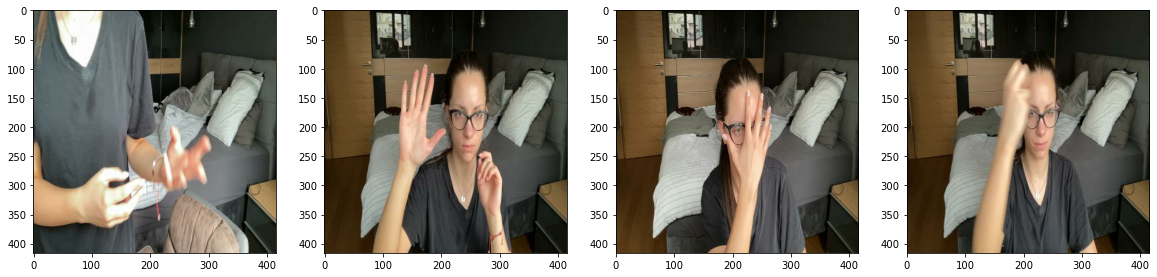

In [45]:
fig,ax = plt.subplots(ncols = 4, figsize = (20,20))
for idx, image in enumerate(plot_images):
    ax[idx].imshow(image)
    
plt.show()